## 1. Loading Liabraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data
df = pd.read_csv('../data/Churn_Modelling.csv')

In [3]:
pd.set_option('display.max_columns', None)

## 2. Understanding the data

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 3. Visualize missing values

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.isnull().sum().sum()

np.int64(0)

In [10]:
missing = df.isnull().sum()

missing = missing[missing > 0]

if not missing.empty:
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x=missing.index, y=missing.values)

    for i, v in enumerate(missing.values):
        ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

    plt.title("Number of missing values by columns")
    plt.ylabel("Missing values")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values in the dataset.")

✅ No missing values in the dataset.


## 4. Data Manipulation

In [11]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 5. Data Visualization

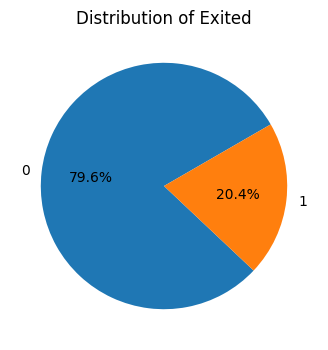

In [12]:
counts = df.Exited.value_counts()
plt.figure(figsize=(4,4))
plt.pie(counts.values, labels=counts.index, startangle=30, autopct='%.1f%%')
plt.title('Distribution of Exited')
plt.show()

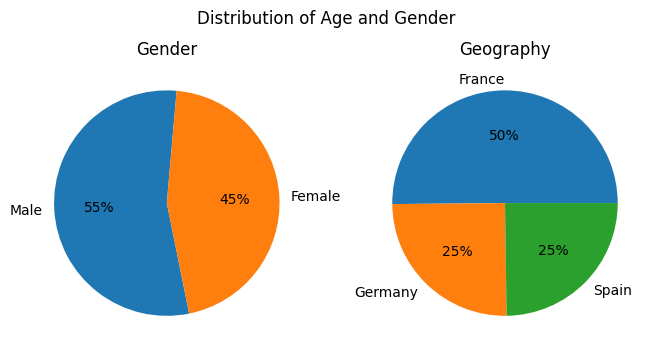

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))
fig.suptitle("Distribution of Age and Gender")
labels = list(df.Gender.value_counts().index)
size = df.Gender.value_counts()
ax[0].pie(size, labels=labels, startangle=85, autopct='%1.0f%%', pctdistance=0.6)
ax[0].set_title("Gender")

labels = df.Geography.value_counts().index
size = df.Geography.value_counts()
ax[1].pie(size, labels=labels, autopct='%1.0f%%', pctdistance=0.6)
ax[1].set_title("Geography")

plt.show()

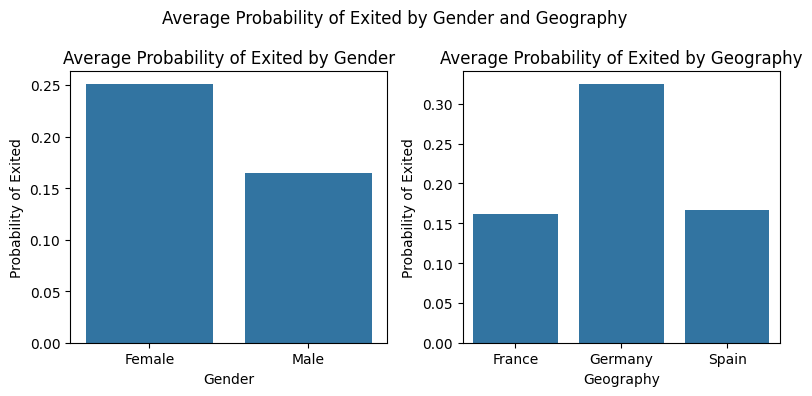

In [14]:
# Создание подграфиков
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Average Probability of Exited by Gender and Geography')

# График по полу (Gender)
gender_outcome = df.groupby('Gender')['Exited'].mean().reset_index()
sns.barplot(data=gender_outcome, x='Gender', y='Exited', ax=ax[0])
ax[0].set_title('Average Probability of Exited by Gender')
ax[0].set_ylabel('Probability of Exited')
ax[0].set_xlabel('Gender')

# График по географии (Geography)
geography_outcome = df.groupby('Geography')['Exited'].mean().reset_index()
sns.barplot(data=geography_outcome, x='Geography', y='Exited', ax=ax[1])
ax[1].set_title('Average Probability of Exited by Geography')
ax[1].set_ylabel('Probability of Exited')
ax[1].set_xlabel('Geography')

# Показать графики
plt.tight_layout()
plt.show()

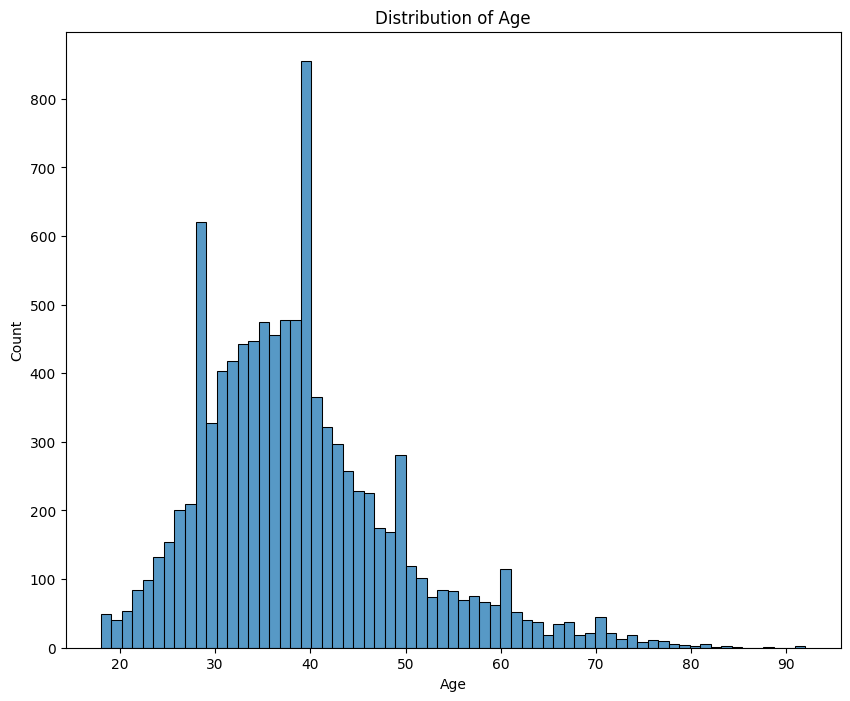

In [15]:
plt.figure(figsize=(10,8))
ax = sns.histplot(df['Age'])
plt.title('Distribution of Age')
plt.show()

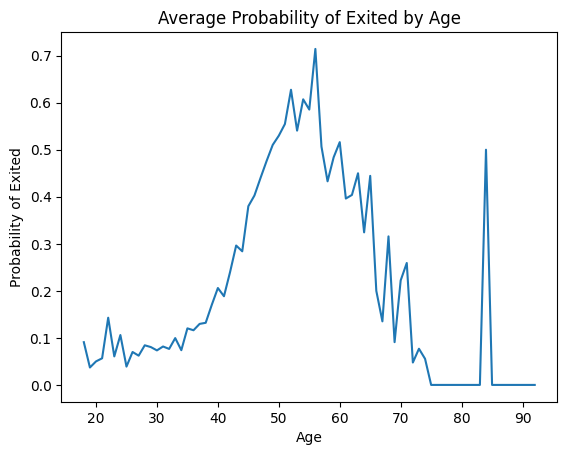

In [16]:
age_outcome = df.groupby('Age')['Exited'].mean().reset_index()

sns.lineplot(data=age_outcome, x='Age', y='Exited')
plt.title('Average Probability of Exited by Age')
plt.ylabel('Probability of Exited')
plt.xlabel('Age')
plt.show()

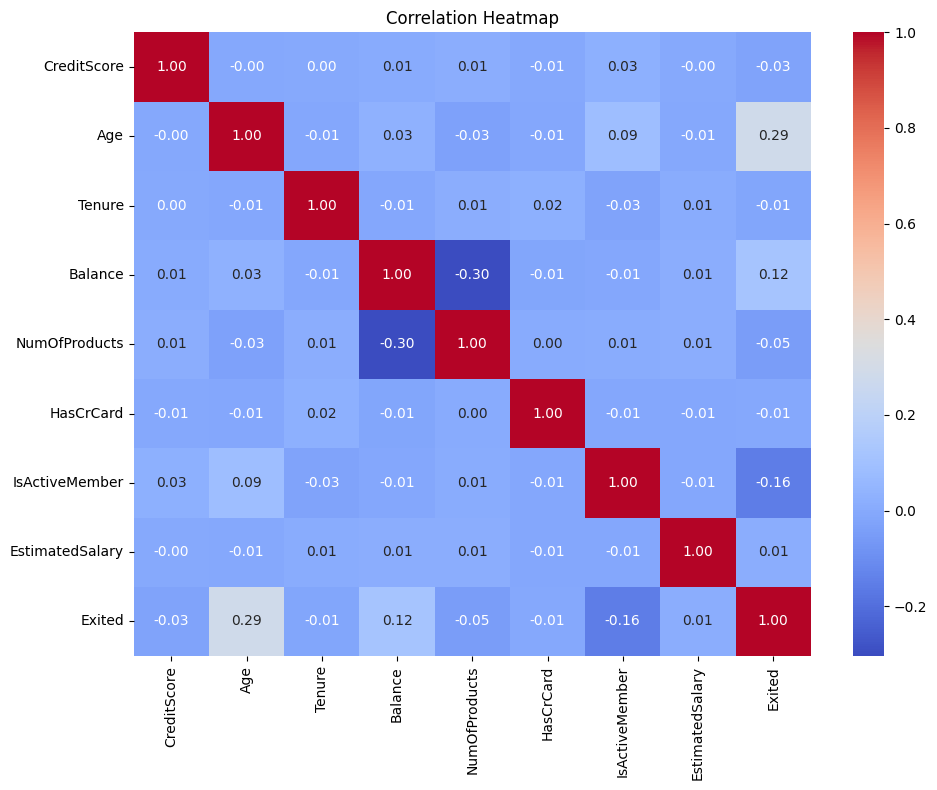

In [17]:
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    heatmap = sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

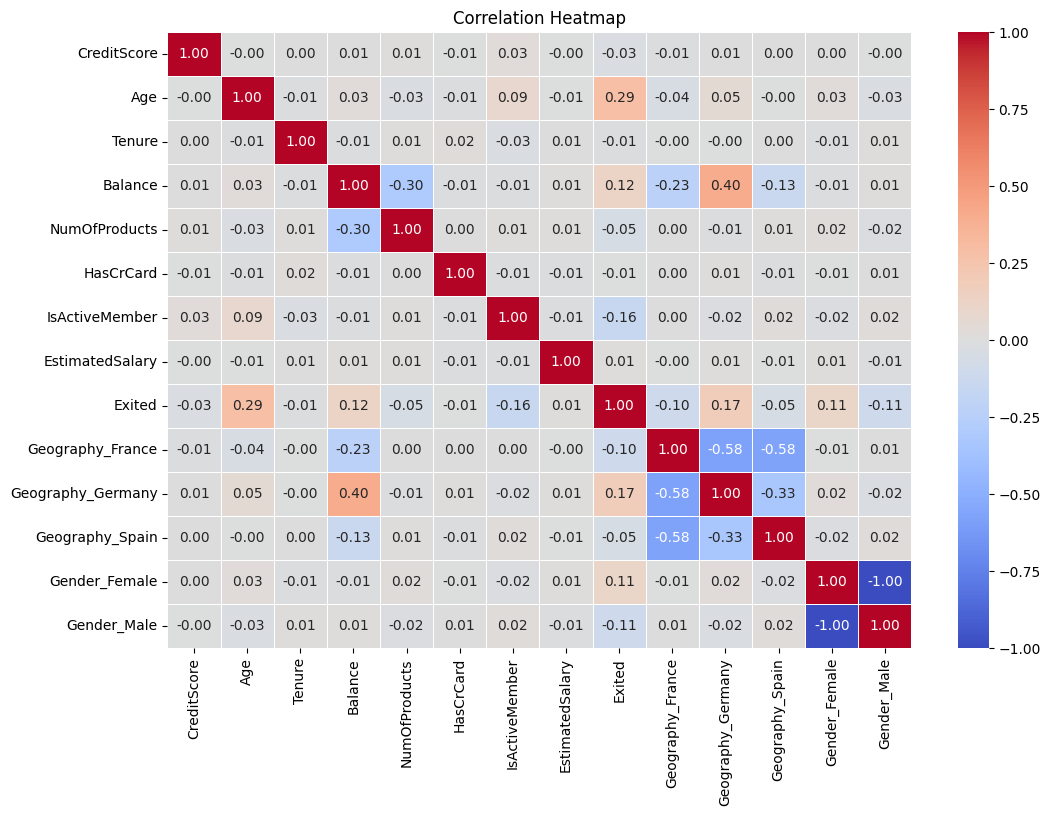

In [19]:
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=False)

corr_matrix = df_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## 6. Data Preprocessing

## 7. Machine Learning Model

https://www.kaggle.com/code/bhartiprasad17/customer-churn-prediction#-3.-Undertanding-the-data